# Multi-Layer Perceptron in `keras`

In this series of lab sessions, you will use a Python library called `keras`.
You should visit [`keras` webpage](https://keras.io/) to get access to more information about this library, including a comprehensive documentation.

## The `Sequential` model in `keras`

This library offers two ways to define neural network models. 
We will start with the `Sequential` class of `keras` models.
Below is an example of how to define a `Sequential` model:

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer

**1. Define layers, and add them one by one to the model**


In [2]:
input_layer = InputLayer(input_shape=(24,))
hidden_layer1 = Dense(units=12, activation="relu")
hidden_layer2 = Dense(units=12, activation="sigmoid")
#[...]
output_layer = Dense(units=3, activation="linear")

model = Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    # ...
    output_layer
])

2024-02-02 17:02:04.146686: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-02-02 17:02:04.146704: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-02-02 17:02:04.146708: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-02-02 17:02:04.146756: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-02 17:02:04.146786: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


**2. Pick an optimization algorithm (optimizer) and a loss function to be optimized**

Usual loss functions are:
* `"mse"` for regression,
* `"categorical_crossentropy"` for multiclass classification (when the `y` array fed to `fit` is of shape $(n, n_\text{classes})$)
* `"binary_crossentropy"` for binary classification (when the model is fed with `y` array of shape $(n, 1)$)

One can also specify additional metrics to be printed during training (correct classification rate here).

In [3]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

**3. Fit the model**

NB: do not try to execute the following line of code: variables `X_train` and `y_train` do not exist yet!

In [4]:
#model.fit(X_train, y_train, verbose=2, epochs=10, batch_size=200)

## Data pre-processing

Have a look at the `prepare_mnist` and `prepare_boston` functions defined below.

**Question #1.** What do these functions do? What are the shapes of returned arrays? Does the returned data correpond to classification or regression problems?

In [5]:
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist, boston_housing
from keras.utils import to_categorical

def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test


def prepare_boston():
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    scaler_x = MinMaxScaler()
    scaler_x.fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    scaler_y = MinMaxScaler()
    scaler_y.fit(y_train.reshape((-1, 1)))
    y_train = scaler_y.transform(y_train.reshape((-1, 1)))
    y_test = scaler_y.transform(y_test.reshape((-1, 1)))
    return x_train, x_test, y_train, y_test
  
x_train, x_test, y_train, y_test = prepare_mnist()

In [6]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [7]:
x_train, x_test, y_train, y_test = prepare_boston()

In [8]:
print(x_train.shape, y_train.shape)
print(y_train[:10])

(404, 13) (404, 1)
[[0.22666667]
 [0.82888889]
 [1.        ]
 [0.35777778]
 [0.28222222]
 [0.3       ]
 [0.14      ]
 [0.23555556]
 [0.23555556]
 [0.20888889]]


## Building your first models

In the following, when fitting models, restrict the training to 10 epochs (which is not realistic, but training for more epochs takes time...)

**Question #2.** Following the guidelines provided above, implement a linear regression model for the `boston` dataset that would optimize on a least squares objective using Stochastic Gradient Descent and fit your model to the corresponding training data.

In [9]:
input_layer = InputLayer(input_shape=(13,))
output_layer = Dense(units=1, activation="linear")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
5/5 - 0s - loss: 0.3707 - 260ms/epoch - 52ms/step
Epoch 2/10


2024-02-02 17:02:04.908001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5/5 - 0s - loss: 0.1858 - 36ms/epoch - 7ms/step
Epoch 3/10
5/5 - 0s - loss: 0.1155 - 31ms/epoch - 6ms/step
Epoch 4/10
5/5 - 0s - loss: 0.0799 - 32ms/epoch - 6ms/step
Epoch 5/10
5/5 - 0s - loss: 0.0566 - 28ms/epoch - 6ms/step
Epoch 6/10
5/5 - 0s - loss: 0.0483 - 27ms/epoch - 5ms/step
Epoch 7/10
5/5 - 0s - loss: 0.0449 - 33ms/epoch - 7ms/step
Epoch 8/10
5/5 - 0s - loss: 0.0428 - 31ms/epoch - 6ms/step
Epoch 9/10
5/5 - 0s - loss: 0.0412 - 33ms/epoch - 7ms/step
Epoch 10/10
5/5 - 0s - loss: 0.0403 - 31ms/epoch - 6ms/step


**Question #3.** Similarly, define a logistic regression model for the `mnist` dataset and print its training accuracy during training.

In [10]:
import tensorflow as tf

x_train, x_test, y_train, y_test = prepare_mnist()

input_layer = InputLayer(input_shape=x_train.shape[1:])
output_layer = Dense(units=y_train.shape[1], activation="softmax")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 4s - loss: 0.6344 - accuracy: 0.8424 - 4s/epoch - 7ms/step
Epoch 2/10
600/600 - 4s - loss: 0.3465 - accuracy: 0.9061 - 4s/epoch - 7ms/step
Epoch 3/10
600/600 - 4s - loss: 0.3099 - accuracy: 0.9138 - 4s/epoch - 7ms/step
Epoch 4/10
600/600 - 4s - loss: 0.2924 - accuracy: 0.9187 - 4s/epoch - 6ms/step
Epoch 5/10
600/600 - 4s - loss: 0.2822 - accuracy: 0.9218 - 4s/epoch - 7ms/step
Epoch 6/10
600/600 - 4s - loss: 0.2750 - accuracy: 0.9229 - 4s/epoch - 7ms/step
Epoch 7/10
600/600 - 4s - loss: 0.2696 - accuracy: 0.9243 - 4s/epoch - 7ms/step
Epoch 8/10
600/600 - 4s - loss: 0.2655 - accuracy: 0.9259 - 4s/epoch - 6ms/step
Epoch 9/10
600/600 - 4s - loss: 0.2621 - accuracy: 0.9270 - 4s/epoch - 7ms/step
Epoch 10/10
600/600 - 4s - loss: 0.2595 - accuracy: 0.9276 - 4s/epoch - 6ms/step


**Question #4.** Compare performance (in terms of training accuracy, we will come back to better ways to compare models afterwards) of this logistic regression model with that of a neural network with respectively 1, 2, and 3 hidden layers of 128 neurons each.
You will use the `"relu"` activation function for hidden layers.

In [11]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - loss: 0.3938 - accuracy: 0.8882 - 5s/epoch - 8ms/step
Epoch 2/10
600/600 - 4s - loss: 0.2954 - accuracy: 0.9175 - 4s/epoch - 7ms/step
Epoch 3/10
600/600 - 4s - loss: 0.2882 - accuracy: 0.9193 - 4s/epoch - 7ms/step
Epoch 4/10
600/600 - 4s - loss: 0.2869 - accuracy: 0.9206 - 4s/epoch - 7ms/step
Epoch 5/10
600/600 - 4s - loss: 0.2854 - accuracy: 0.9196 - 4s/epoch - 7ms/step
Epoch 6/10
600/600 - 4s - loss: 0.2849 - accuracy: 0.9210 - 4s/epoch - 7ms/step
Epoch 7/10
600/600 - 4s - loss: 0.2880 - accuracy: 0.9209 - 4s/epoch - 7ms/step
Epoch 8/10
600/600 - 4s - loss: 0.2912 - accuracy: 0.9192 - 4s/epoch - 7ms/step
Epoch 9/10
600/600 - 4s - loss: 0.2950 - accuracy: 0.9187 - 4s/epoch - 7ms/step
Epoch 10/10
600/600 - 4s - loss: 0.2962 - accuracy: 0.9195 - 4s/epoch - 7ms/step


In [12]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - loss: 0.4121 - accuracy: 0.8828 - 5s/epoch - 8ms/step
Epoch 2/10
600/600 - 5s - loss: 0.6697 - accuracy: 0.8640 - 5s/epoch - 8ms/step
Epoch 3/10
600/600 - 5s - loss: 1.6338 - accuracy: 0.8278 - 5s/epoch - 8ms/step
Epoch 4/10
600/600 - 5s - loss: 2.6307 - accuracy: 0.8203 - 5s/epoch - 8ms/step
Epoch 5/10
600/600 - 5s - loss: 3.7319 - accuracy: 0.8098 - 5s/epoch - 8ms/step
Epoch 6/10
600/600 - 5s - loss: 4.9935 - accuracy: 0.8091 - 5s/epoch - 8ms/step
Epoch 7/10
600/600 - 5s - loss: 6.5056 - accuracy: 0.8073 - 5s/epoch - 8ms/step
Epoch 8/10
600/600 - 4s - loss: 8.0399 - accuracy: 0.8063 - 4s/epoch - 7ms/step
Epoch 9/10
600/600 - 5s - loss: 9.3308 - accuracy: 0.8024 - 5s/epoch - 8ms/step
Epoch 10/10
600/600 - 5s - loss: 12.3789 - accuracy: 0.7955 - 5s/epoch - 8ms/step


In [13]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - loss: 1.8584 - accuracy: 0.8067 - 5s/epoch - 9ms/step
Epoch 2/10
600/600 - 5s - loss: 49.2097 - accuracy: 0.5727 - 5s/epoch - 8ms/step
Epoch 3/10
600/600 - 5s - loss: 202.2422 - accuracy: 0.4802 - 5s/epoch - 8ms/step
Epoch 4/10
600/600 - 5s - loss: 497.8115 - accuracy: 0.4357 - 5s/epoch - 8ms/step
Epoch 5/10
600/600 - 5s - loss: 919.3269 - accuracy: 0.4154 - 5s/epoch - 8ms/step
Epoch 6/10
600/600 - 5s - loss: 1448.4635 - accuracy: 0.4041 - 5s/epoch - 8ms/step
Epoch 7/10
600/600 - 5s - loss: 2249.8123 - accuracy: 0.3863 - 5s/epoch - 8ms/step
Epoch 8/10
600/600 - 5s - loss: 3079.7344 - accuracy: 0.3814 - 5s/epoch - 8ms/step
Epoch 9/10
600/600 - 5s - loss: 3921.3958 - accuracy: 0.3736 - 5s/epoch - 8ms/step
Epoch 10/10
600/600 - 5s - loss: 5095.5479 - accuracy: 0.3709 - 5s/epoch - 9ms/step


In [14]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Question #5.** `keras` models offer a `count_params()` method to get the number of parameters to be learned in the model. Use this facility to get the number of parameters of your 3-hidden-layer model and build a new one-hidden-layer model with an equivalent number of parameters. Compare performance of these two models with similar number of parameters.

In [15]:
units = 134794 / 794

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

134365
Epoch 1/10
600/600 - 5s - loss: 0.3821 - accuracy: 0.8922 - 5s/epoch - 8ms/step
Epoch 2/10
600/600 - 4s - loss: 0.2955 - accuracy: 0.9172 - 4s/epoch - 7ms/step
Epoch 3/10
600/600 - 4s - loss: 0.2910 - accuracy: 0.9191 - 4s/epoch - 7ms/step
Epoch 4/10
600/600 - 4s - loss: 0.2900 - accuracy: 0.9195 - 4s/epoch - 7ms/step
Epoch 5/10
600/600 - 4s - loss: 0.2908 - accuracy: 0.9200 - 4s/epoch - 7ms/step
Epoch 6/10
600/600 - 5s - loss: 0.2921 - accuracy: 0.9189 - 5s/epoch - 8ms/step
Epoch 7/10
600/600 - 5s - loss: 0.2984 - accuracy: 0.9182 - 5s/epoch - 8ms/step
Epoch 8/10
600/600 - 4s - loss: 0.3002 - accuracy: 0.9181 - 4s/epoch - 7ms/step
Epoch 9/10
600/600 - 4s - loss: 0.3020 - accuracy: 0.9183 - 4s/epoch - 7ms/step
Epoch 10/10
600/600 - 4s - loss: 0.3087 - accuracy: 0.9168 - 4s/epoch - 7ms/step


## A better way to compare models

Comparing models based on training accuracy (resp. loss) is a "great" way to overfit your model to the training data.
A better way to compare models is to use hold out data (aka validation set).

To do so, `keras` allows to pass, at `fit` time, a fraction of the training data to be used as validation set. Have a look [there](https://keras.io/api/models/model_training_apis/#fit-method) for more details about how validation samples are selected.

**Question #6.** Repeat model comparisons above (relying on validation scores) using 30% of training data as validation set.

In [16]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

Epoch 1/10
420/420 - 5s - loss: 0.6144 - accuracy: 0.8413 - val_loss: 1.7118 - val_accuracy: 0.7206 - 5s/epoch - 12ms/step
Epoch 2/10
420/420 - 5s - loss: 19.9363 - accuracy: 0.6029 - val_loss: 27.8286 - val_accuracy: 0.5671 - 5s/epoch - 11ms/step
Epoch 3/10
420/420 - 5s - loss: 85.3183 - accuracy: 0.4922 - val_loss: 113.0518 - val_accuracy: 0.4918 - 5s/epoch - 11ms/step
Epoch 4/10
420/420 - 5s - loss: 229.5235 - accuracy: 0.4400 - val_loss: 210.3852 - val_accuracy: 0.3343 - 5s/epoch - 11ms/step
Epoch 5/10
420/420 - 5s - loss: 404.0652 - accuracy: 0.4273 - val_loss: 588.5295 - val_accuracy: 0.3816 - 5s/epoch - 11ms/step
Epoch 6/10
420/420 - 5s - loss: 697.6278 - accuracy: 0.4088 - val_loss: 953.0876 - val_accuracy: 0.4579 - 5s/epoch - 11ms/step
Epoch 7/10
420/420 - 5s - loss: 892.5058 - accuracy: 0.4097 - val_loss: 821.6179 - val_accuracy: 0.4669 - 5s/epoch - 12ms/step
Epoch 8/10
420/420 - 7s - loss: 1285.6104 - accuracy: 0.3974 - val_loss: 1987.2297 - val_accuracy: 0.3044 - 7s/epoch -

In [17]:
units = 134794 / 794

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

134365
Epoch 1/10
420/420 - 6s - loss: 0.4259 - accuracy: 0.8789 - val_loss: 0.3086 - val_accuracy: 0.9135 - 6s/epoch - 14ms/step
Epoch 2/10
420/420 - 5s - loss: 0.2997 - accuracy: 0.9146 - val_loss: 0.3115 - val_accuracy: 0.9111 - 5s/epoch - 11ms/step
Epoch 3/10
420/420 - 6s - loss: 0.2891 - accuracy: 0.9185 - val_loss: 0.3086 - val_accuracy: 0.9144 - 6s/epoch - 14ms/step
Epoch 4/10
420/420 - 6s - loss: 0.2864 - accuracy: 0.9195 - val_loss: 0.3068 - val_accuracy: 0.9144 - 6s/epoch - 15ms/step
Epoch 5/10
420/420 - 4s - loss: 0.2854 - accuracy: 0.9197 - val_loss: 0.3013 - val_accuracy: 0.9223 - 4s/epoch - 10ms/step
Epoch 6/10
420/420 - 4s - loss: 0.2866 - accuracy: 0.9197 - val_loss: 0.3171 - val_accuracy: 0.9127 - 4s/epoch - 10ms/step
Epoch 7/10
420/420 - 4s - loss: 0.2832 - accuracy: 0.9208 - val_loss: 0.3104 - val_accuracy: 0.9203 - 4s/epoch - 10ms/step
Epoch 8/10
420/420 - 4s - loss: 0.2886 - accuracy: 0.9174 - val_loss: 0.3590 - val_accuracy: 0.9063 - 4s/epoch - 10ms/step
Epoch 9/1

## Optimizers and learning rate

**Question #7.** Change the optimizer used for your model. Use an optimizer with momentum and adaptive learning rate.

In [18]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 5s - loss: 0.4382 - accuracy: 0.8743 - val_loss: 0.3383 - val_accuracy: 0.9051 - 5s/epoch - 12ms/step
Epoch 2/10
420/420 - 4s - loss: 0.3825 - accuracy: 0.8962 - val_loss: 0.4932 - val_accuracy: 0.8739 - 4s/epoch - 10ms/step
Epoch 3/10
420/420 - 4s - loss: 0.6338 - accuracy: 0.8645 - val_loss: 0.8431 - val_accuracy: 0.8511 - 4s/epoch - 10ms/step
Epoch 4/10
420/420 - 4s - loss: 1.1444 - accuracy: 0.8382 - val_loss: 1.2564 - val_accuracy: 0.8558 - 4s/epoch - 10ms/step
Epoch 5/10
420/420 - 4s - loss: 1.6697 - accuracy: 0.8303 - val_loss: 2.7345 - val_accuracy: 0.7727 - 4s/epoch - 11ms/step
Epoch 6/10
420/420 - 4s - loss: 2.5544 - accuracy: 0.8179 - val_loss: 2.5920 - val_accuracy: 0.8232 - 4s/epoch - 10ms/step
Epoch 7/10
420/420 - 4s - loss: 3.1594 - accuracy: 0.8206 - val_loss: 3.1722 - val_accuracy: 0.8287 - 4s/epoch - 10ms/step
Epoch 8/10
420/420 - 4s - loss: 4.1119 - accuracy: 0.8188 - val_loss: 4.5760 - val_accuracy: 0.8174 - 4s/epoch - 10ms/step
Epoch 9/10
420/4

In [19]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - loss: 1.2378 - accuracy: 0.6584 - val_loss: 0.6505 - val_accuracy: 0.8383 - 4s/epoch - 10ms/step
Epoch 2/10
420/420 - 4s - loss: 0.5468 - accuracy: 0.8576 - val_loss: 0.4552 - val_accuracy: 0.8759 - 4s/epoch - 10ms/step
Epoch 3/10
420/420 - 4s - loss: 0.4328 - accuracy: 0.8822 - val_loss: 0.3959 - val_accuracy: 0.8889 - 4s/epoch - 10ms/step
Epoch 4/10
420/420 - 4s - loss: 0.3874 - accuracy: 0.8920 - val_loss: 0.3673 - val_accuracy: 0.8949 - 4s/epoch - 9ms/step
Epoch 5/10
420/420 - 4s - loss: 0.3634 - accuracy: 0.8981 - val_loss: 0.3523 - val_accuracy: 0.9008 - 4s/epoch - 9ms/step
Epoch 6/10
420/420 - 4s - loss: 0.3480 - accuracy: 0.9029 - val_loss: 0.3397 - val_accuracy: 0.9037 - 4s/epoch - 10ms/step
Epoch 7/10
420/420 - 4s - loss: 0.3369 - accuracy: 0.9061 - val_loss: 0.3332 - val_accuracy: 0.9045 - 4s/epoch - 10ms/step
Epoch 8/10
420/420 - 4s - loss: 0.3292 - accuracy: 0.9079 - val_loss: 0.3263 - val_accuracy: 0.9074 - 4s/epoch - 10ms/step
Epoch 9/10
420/420

In [20]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 5s - loss: 0.4393 - accuracy: 0.8746 - val_loss: 0.3551 - val_accuracy: 0.8988 - 5s/epoch - 11ms/step
Epoch 2/10
420/420 - 4s - loss: 0.4900 - accuracy: 0.8775 - val_loss: 0.6364 - val_accuracy: 0.8735 - 4s/epoch - 10ms/step
Epoch 3/10
420/420 - 4s - loss: 0.9398 - accuracy: 0.8452 - val_loss: 1.0694 - val_accuracy: 0.8383 - 4s/epoch - 10ms/step
Epoch 4/10
420/420 - 5s - loss: 1.6145 - accuracy: 0.8255 - val_loss: 2.6174 - val_accuracy: 0.7718 - 5s/epoch - 11ms/step
Epoch 5/10
420/420 - 4s - loss: 2.2794 - accuracy: 0.8246 - val_loss: 2.1097 - val_accuracy: 0.8531 - 4s/epoch - 10ms/step
Epoch 6/10
420/420 - 4s - loss: 3.1509 - accuracy: 0.8143 - val_loss: 2.8990 - val_accuracy: 0.8306 - 4s/epoch - 10ms/step
Epoch 7/10
420/420 - 5s - loss: 4.3370 - accuracy: 0.8044 - val_loss: 5.0953 - val_accuracy: 0.7986 - 5s/epoch - 11ms/step
Epoch 8/10
420/420 - 5s - loss: 5.3691 - accuracy: 0.8063 - val_loss: 6.0889 - val_accuracy: 0.8267 - 5s/epoch - 11ms/step
Epoch 9/10
420/4

**Question #8.** Using [the docs](https://keras.io/api/optimizers/), vary the learning rate of your optimizer from a very low value to a much larger one so as to show evidence of:
* instability when the learning rate is too large;
* slow convergence when the learning rate is too low.

In [21]:
from keras.optimizers import Adam

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10


2024-02-02 17:09:39.754910: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


420/420 - 5s - loss: 1.0283 - accuracy: 0.7206 - val_loss: 0.4721 - val_accuracy: 0.8797 - 5s/epoch - 11ms/step
Epoch 2/10
420/420 - 5s - loss: 0.4113 - accuracy: 0.8890 - val_loss: 0.3560 - val_accuracy: 0.9007 - 5s/epoch - 11ms/step
Epoch 3/10
420/420 - 4s - loss: 0.3431 - accuracy: 0.9042 - val_loss: 0.3244 - val_accuracy: 0.9096 - 4s/epoch - 10ms/step
Epoch 4/10
420/420 - 4s - loss: 0.3179 - accuracy: 0.9109 - val_loss: 0.3104 - val_accuracy: 0.9123 - 4s/epoch - 10ms/step
Epoch 5/10
420/420 - 4s - loss: 0.3040 - accuracy: 0.9151 - val_loss: 0.3023 - val_accuracy: 0.9160 - 4s/epoch - 10ms/step
Epoch 6/10
420/420 - 4s - loss: 0.2951 - accuracy: 0.9174 - val_loss: 0.2972 - val_accuracy: 0.9181 - 4s/epoch - 10ms/step
Epoch 7/10
420/420 - 5s - loss: 0.2894 - accuracy: 0.9185 - val_loss: 0.2965 - val_accuracy: 0.9175 - 5s/epoch - 11ms/step
Epoch 8/10
420/420 - 4s - loss: 0.2846 - accuracy: 0.9209 - val_loss: 0.2902 - val_accuracy: 0.9193 - 4s/epoch - 11ms/step
Epoch 9/10
420/420 - 4s - l

## Callbacks

Callbacks are tools that, in `keras`, allow one to intervene during the training process of a model. 
Callbacks can be used to take actions (_ie._ save intermediate model, stop optimization if overfitting occurs, _etc._).

A first callback one can play with is the one returned by any call to `fit` on a `keras` model.
This callback is an object with an `.history` attribute in the form of a Python dictionnary whose keys are the metrics recorded during training. Each of these keys links to an array containing the consecutive values of the considered quantity (one value per epoch).

**Question #9.** Plot correct classification rates on both training and validation sets.

In [22]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 5s - loss: 0.4437 - accuracy: 0.8730 - val_loss: 0.3658 - val_accuracy: 0.8962 - 5s/epoch - 12ms/step
Epoch 2/10
420/420 - 4s - loss: 0.4291 - accuracy: 0.8889 - val_loss: 0.6624 - val_accuracy: 0.8678 - 4s/epoch - 10ms/step
Epoch 3/10
420/420 - 4s - loss: 0.7805 - accuracy: 0.8559 - val_loss: 0.9537 - val_accuracy: 0.8488 - 4s/epoch - 10ms/step
Epoch 4/10
420/420 - 4s - loss: 1.3826 - accuracy: 0.8340 - val_loss: 1.2076 - val_accuracy: 0.8631 - 4s/epoch - 10ms/step
Epoch 5/10
420/420 - 4s - loss: 2.0240 - accuracy: 0.8274 - val_loss: 1.6989 - val_accuracy: 0.8669 - 4s/epoch - 10ms/step
Epoch 6/10
420/420 - 5s - loss: 2.8265 - accuracy: 0.8178 - val_loss: 3.1032 - val_accuracy: 0.8077 - 5s/epoch - 11ms/step
Epoch 7/10
420/420 - 5s - loss: 3.6243 - accuracy: 0.8175 - val_loss: 3.9955 - val_accuracy: 0.8087 - 5s/epoch - 11ms/step
Epoch 8/10
420/420 - 5s - loss: 4.7128 - accuracy: 0.8103 - val_loss: 4.6812 - val_accuracy: 0.8232 - 5s/epoch - 11ms/step
Epoch 9/10
420/4

In [23]:
h.history

{'loss': [0.4436965584754944,
  0.4291226267814636,
  0.7804890275001526,
  1.3826109170913696,
  2.024038791656494,
  2.8265128135681152,
  3.6242775917053223,
  4.712779998779297,
  6.365214824676514,
  6.530720233917236],
 'accuracy': [0.872952401638031,
  0.8889285922050476,
  0.855904757976532,
  0.8339762091636658,
  0.8273809552192688,
  0.8177618980407715,
  0.817476212978363,
  0.8102856874465942,
  0.8040714263916016,
  0.8111904859542847],
 'val_loss': [0.365767240524292,
  0.6623786091804504,
  0.953703761100769,
  1.2076003551483154,
  1.6989431381225586,
  3.103198766708374,
  3.995496988296509,
  4.681203842163086,
  6.655688285827637,
  5.741034507751465],
 'val_accuracy': [0.8962222337722778,
  0.8677777647972107,
  0.8487777709960938,
  0.863111138343811,
  0.866944432258606,
  0.8077222108840942,
  0.808722198009491,
  0.8232222199440002,
  0.7964444160461426,
  0.8433333039283752]}

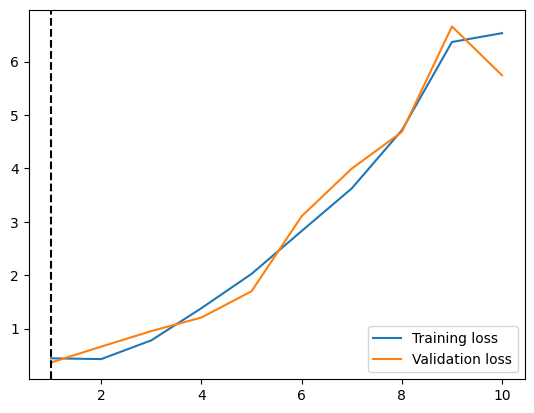

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1, 11), h.history["loss"], label="Training loss")
plt.plot(np.arange(1, 11), h.history["val_loss"], label="Validation loss")
plt.axvline(x=np.argmin(h.history["val_loss"]) + 1, color='k', linestyle='--')
plt.legend();

Setting up other callbacks must be explicit. This is done by passing a list of callbacks to the `fit` method.

When training a model is long, one can wish to record intermediate models (in case of a crash during training, or just for cases when intermediate models were performing better than the final one).
The [`ModelCheckpoint`](https://keras.io/api/callbacks/model_checkpoint/) callback is designed for that purpose.

**Question #10.** Set up recording of intermediate models every epoch. Save the models into a dedicated file `model.keras` on your project. Only record models if validation loss is lower than for all previous models.

In [25]:
from keras.callbacks import ModelCheckpoint

cb = ModelCheckpoint("model.keras", save_best_only=True)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/10
600/600 - 6s - loss: 0.4189 - accuracy: 0.8806 - val_loss: 0.3701 - val_accuracy: 0.8957 - 6s/epoch - 9ms/step
Epoch 2/10
600/600 - 5s - loss: 0.5839 - accuracy: 0.8702 - val_loss: 1.0157 - val_accuracy: 0.8142 - 5s/epoch - 9ms/step
Epoch 3/10
600/600 - 5s - loss: 1.3750 - accuracy: 0.8321 - val_loss: 1.7010 - val_accuracy: 0.8340 - 5s/epoch - 9ms/step
Epoch 4/10
600/600 - 5s - loss: 2.6778 - accuracy: 0.8133 - val_loss: 2.5606 - val_accuracy: 0.8380 - 5s/epoch - 8ms/step
Epoch 5/10
600/600 - 5s - loss: 3.6803 - accuracy: 0.8147 - val_loss: 3.7386 - val_accuracy: 0.8033 - 5s/epoch - 8ms/step
Epoch 6/10
600/600 - 5s - loss: 4.8506 - accuracy: 0.8119 - val_loss: 9.4423 - val_accuracy: 0.7584 - 5s/epoch - 8ms/step
Epoch 7/10
600/600 - 5s - loss: 6.2332 - accuracy: 0.8088 - val_loss: 6.5603 - val_accuracy: 0.8029 - 5s/epoch - 8ms/step
Epoch 8/10
600/600 - 6s - loss: 8.1987 - accuracy: 0.8024 - val_loss: 10.5943 - val_accuracy: 0.7759 - 6s/epoch - 9ms/step
Epoch 9/10
600/600 - 5s

Use the code below to check that a model has been saved:

In [26]:
%ls -alh "model.keras"

-rw-r--r--  1 rtavenar  staff   481K Feb  2 17:11 model.keras


In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 10.1689 - accuracy: 0.8226


[10.168900489807129, 0.8226000070571899]

In [28]:
model.load_weights("model.keras")
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3701 - accuracy: 0.8957


[0.3700898289680481, 0.8956999778747559]

## Regularization

**Question #11.** Add an $\ell_2$ regularization to the weights of your model and show its impact on overfitting. [These docs](https://keras.io/api/layers/regularizers/) could help.

In [29]:
from keras.regularizers import l2

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu", kernel_regularizer=l2(.001)),
    Dense(units=128, activation="relu", kernel_regularizer=l2(.001)),
    Dense(units=y_train.shape[1], activation="softmax", kernel_regularizer=l2(.001))
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.2)

Epoch 1/10
480/480 - 9s - loss: 0.6932 - accuracy: 0.8761 - val_loss: 0.6158 - val_accuracy: 0.9011 - 9s/epoch - 20ms/step
Epoch 2/10
480/480 - 9s - loss: 1.0206 - accuracy: 0.8702 - val_loss: 1.6651 - val_accuracy: 0.8521 - 9s/epoch - 18ms/step
Epoch 3/10
480/480 - 8s - loss: 2.9696 - accuracy: 0.8205 - val_loss: 4.2017 - val_accuracy: 0.8182 - 8s/epoch - 18ms/step
Epoch 4/10
480/480 - 9s - loss: 5.6707 - accuracy: 0.8138 - val_loss: 7.2973 - val_accuracy: 0.8105 - 9s/epoch - 18ms/step
Epoch 5/10
480/480 - 9s - loss: 9.3001 - accuracy: 0.8015 - val_loss: 10.6658 - val_accuracy: 0.8138 - 9s/epoch - 19ms/step
Epoch 6/10
480/480 - 9s - loss: 12.9551 - accuracy: 0.8026 - val_loss: 14.9347 - val_accuracy: 0.8131 - 9s/epoch - 19ms/step
Epoch 7/10
480/480 - 9s - loss: 17.9607 - accuracy: 0.7900 - val_loss: 21.9408 - val_accuracy: 0.7816 - 9s/epoch - 19ms/step
Epoch 8/10
480/480 - 9s - loss: 22.3839 - accuracy: 0.7985 - val_loss: 25.2198 - val_accuracy: 0.7870 - 9s/epoch - 19ms/step
Epoch 9/1

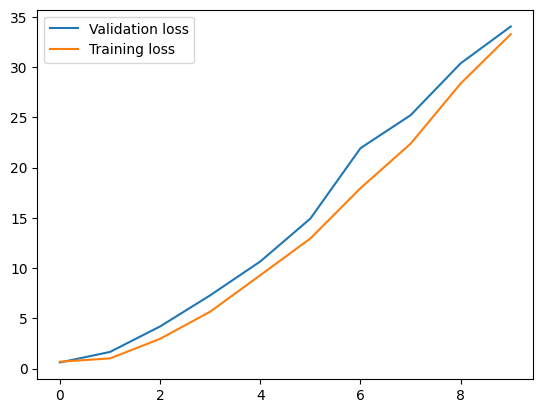

In [30]:
plt.plot(h.history["val_loss"], label="Validation loss")
plt.plot(h.history["loss"], label="Training loss")
plt.legend();

**Question #12.** Instead of the $\ell_2$ regularization, set up a [drop-out](https://keras.io/api/layers/regularization_layers/dropout/) strategy and assess its impact on overfitting (you will turn off 10% of the neurons at each training batch).

In [31]:
from keras.layers import Dropout

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dropout(rate=0.1),
    Dense(units=128, activation="relu"),
    Dropout(rate=0.1),
    Dense(units=128, activation="relu"),
    Dropout(rate=0.1),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.2)

Epoch 1/10
480/480 - 5s - loss: 0.5175 - accuracy: 0.8471 - val_loss: 0.3595 - val_accuracy: 0.9018 - 5s/epoch - 11ms/step
Epoch 2/10
480/480 - 5s - loss: 0.8310 - accuracy: 0.8375 - val_loss: 0.6608 - val_accuracy: 0.8922 - 5s/epoch - 10ms/step
Epoch 3/10
480/480 - 5s - loss: 1.8218 - accuracy: 0.8084 - val_loss: 1.5454 - val_accuracy: 0.8484 - 5s/epoch - 10ms/step
Epoch 4/10
480/480 - 5s - loss: 3.1146 - accuracy: 0.7949 - val_loss: 1.6656 - val_accuracy: 0.8817 - 5s/epoch - 10ms/step
Epoch 5/10
480/480 - 5s - loss: 4.0003 - accuracy: 0.7949 - val_loss: 2.2969 - val_accuracy: 0.8767 - 5s/epoch - 11ms/step
Epoch 6/10
480/480 - 6s - loss: 4.9723 - accuracy: 0.7930 - val_loss: 2.5202 - val_accuracy: 0.8732 - 6s/epoch - 12ms/step
Epoch 7/10
480/480 - 5s - loss: 5.8497 - accuracy: 0.7894 - val_loss: 3.4594 - val_accuracy: 0.8485 - 5s/epoch - 11ms/step
Epoch 8/10
480/480 - 5s - loss: 6.6248 - accuracy: 0.7871 - val_loss: 3.9581 - val_accuracy: 0.8587 - 5s/epoch - 11ms/step
Epoch 9/10
480/4

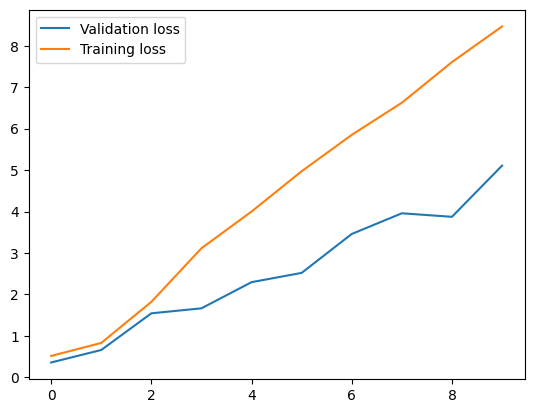

In [32]:
plt.plot(h.history["val_loss"], label="Validation loss")
plt.plot(h.history["loss"], label="Training loss")
plt.legend();

**Question #13.** Set up an [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/) strategy such that training the model will stop in case the validation loss does not decrease for 5 consecutive epochs.

In [33]:
from keras.callbacks import EarlyStopping

cb = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/100
600/600 - 6s - loss: 0.4144 - accuracy: 0.8832 - val_loss: 0.3531 - val_accuracy: 0.8996 - 6s/epoch - 10ms/step
Epoch 2/100
600/600 - 5s - loss: 0.5933 - accuracy: 0.8700 - val_loss: 0.7460 - val_accuracy: 0.8669 - 5s/epoch - 9ms/step
Epoch 3/100
600/600 - 5s - loss: 1.3626 - accuracy: 0.8325 - val_loss: 2.7574 - val_accuracy: 0.7939 - 5s/epoch - 9ms/step
Epoch 4/100
600/600 - 5s - loss: 2.4181 - accuracy: 0.8191 - val_loss: 3.6652 - val_accuracy: 0.7909 - 5s/epoch - 9ms/step


In [34]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3531 - accuracy: 0.8996


[0.35313332080841064, 0.8996000289916992]